<a href="https://colab.research.google.com/github/Aakash-mishra2/electricity-bill-by-devices-clustering/blob/main/Electricity_bill_management.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import zipfile
import cv2
import plotly.express as px
import tensorflow as tf
from tensorflow.python.keras import Sequential
from tensorflow.keras import layers, optimizers
from tensorflow.keras.applications.resnet50 import ResNet50
from tensorflow.keras.layers import Input, Add, Dense, Activation, ZeroPadding2D, BatchNormalization, Flatten, Conv2D, AveragePooling2D, MaxPooling2D, Dropout
from tensorflow.keras.models import Model, load_model
from tensorflow.keras.initializers import glorot_uniform
from tensorflow.keras.utils import plot_model
from tensorflow.keras.callbacks import ReduceLROnPlateau, EarlyStopping, ModelCheckpoint, LearningRateScheduler
from IPython.display import display
from tensorflow.keras import backend as K
from sklearn.preprocessing import StandardScaler, normalize
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score
from sklearn.manifold import TSNE
from sklearn.metrics.pairwise import cosine_similarity
import plotly.express as px
import plotly.graph_objects as go

from google.colab import files #library to upload files to colab notebook
%matplotlib inline

In [2]:
# Mount the drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
electricity_df = pd.read_csv('/content/drive/My Drive/Colab Notebooks/Indian Electricity_data/electricity_bill_dataset.csv', encoding = 'unicode_escape')
# Note: MSRP is the manufacturer's suggested retail price (MSRP) or sticker price represents the suggested retail price of products.
# MSRP is used to standardize the price of products over multiple company store locations.

In [4]:
electricity_df

,Fan,Refrigerator,AirConditioner,Television,Monitor,MotorPump,Month,City,Company,MonthlyHours,TariffRate,ElectricityBill
0,16,23.0,2.0,6.0,1.0,0,10,Hyderabad,Tata Power Company Ltd.,384,8.4,3225.6
1,19,22.0,2.0,3.0,1.0,0,5,Vadodara,NHPC,488,7.8,3806.4
2,7,20.0,2.0,6.0,7.0,0,7,Shimla,Jyoti Structure,416,7.7,3203.2
3,7,22.0,3.0,21.0,1.0,0,6,Mumbai,Power Grid Corp,475,9.2,4370.0
4,11,23.0,2.0,11.0,1.0,0,2,Mumbai,Ratnagiri Gas and Power Pvt. Ltd. (RGPPL),457,9.2,4204.4
...,...,...,...,...,...,...,...,...,...,...,...,...
45340,18,22.0,3.0,22.0,1.0,0,9,Ahmedabad,Maha Transco â Maharashtra State Electricity...,764,7.9,6035.6
45341,23,23.0,2.0,6.0,12.0,0,2,New Delhi,Orient Green,572,8.5,4862.0
45342,22,22.0,2.0,20.0,1.0,0,1,New Delhi,GE T&D India Limited,609,8.5,5176.5
45343,8,21.0,2.0,22.0,7.0,0,12,Ratnagiri,TransRail Lighting,748,7.4,5535.2


In [6]:
electricity_df.dtypes

Fan                  int64
Refrigerator       float64
AirConditioner     float64
Television         float64
Monitor            float64
MotorPump            int64
Month                int64
City                object
Company             object
MonthlyHours         int64
TariffRate         float64
ElectricityBill    float64
dtype: object

In [7]:
electricity_df.nunique()

Fan                  19
Refrigerator          7
AirConditioner        4
Television           20
Monitor               3
MotorPump             1
Month                12
City                 16
Company              32
MonthlyHours        748
TariffRate           16
ElectricityBill    8122
dtype: int64

In [11]:
electricity_df.head()

,Fan,Refrigerator,AirConditioner,Television,Monitor,MotorPump,Month,City,Company,MonthlyHours,TariffRate,ElectricityBill
0,16,23.0,2.0,6.0,1.0,0,10,Hyderabad,Tata Power Company Ltd.,384,8.4,3225.6
1,19,22.0,2.0,3.0,1.0,0,5,Vadodara,NHPC,488,7.8,3806.4
2,7,20.0,2.0,6.0,7.0,0,7,Shimla,Jyoti Structure,416,7.7,3203.2
3,7,22.0,3.0,21.0,1.0,0,6,Mumbai,Power Grid Corp,475,9.2,4370.0
4,11,23.0,2.0,11.0,1.0,0,2,Mumbai,Ratnagiri Gas and Power Pvt. Ltd. (RGPPL),457,9.2,4204.4


In [12]:
electricity_df.isnull().sum()

Fan                0
Refrigerator       0
AirConditioner     0
Television         0
Monitor            0
MotorPump          0
Month              0
City               0
Company            0
MonthlyHours       0
TariffRate         0
ElectricityBill    0
dtype: int64

In [14]:
electricity_df['City'].value_counts()

Hyderabad      2914
Navi Mumbai    2914
Ratnagiri      2892
Faridabad      2891
Gurgaon        2878
Ahmedabad      2868
New Delhi      2848
Mumbai         2846
Chennai        2834
Dahej          2821
Nagpur         2816
Noida          2793
Pune           2788
Shimla         2780
Kolkata        2740
Vadodara       2722
Name: City, dtype: int64

In [16]:
electricity_df['Month'].value_counts()

9     3970
8     3885
3     3829
6     3813
1     3788
11    3787
4     3780
2     3768
5     3711
7     3710
12    3680
10    3624
Name: Month, dtype: int64

In [17]:
electricity_df['Fan'].value_counts()

15    2505
9     2486
7     2457
22    2443
16    2433
10    2401
19    2401
8     2384
21    2380
20    2367
14    2360
5     2359
17    2357
18    2347
6     2340
11    2337
12    2336
13    2336
23    2316
Name: Fan, dtype: int64

In [21]:
elec_df_group = electricity_df.groupby(by='ElectricityBill').sum()
elec_df_group

<ipython-input-21-f028dc7eb3a4>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  elec_df_group = electricity_df.groupby(by='ElectricityBill').sum()


,Fan,Refrigerator,AirConditioner,Television,Monitor,MotorPump,Month,MonthlyHours,TariffRate
ElectricityBill,,,,,,,,,
807.5,5,17.0,0.0,3.0,1.0,0,2,95,8.5
1033.2,6,20.0,0.0,3.0,1.0,0,2,126,8.2
1034.9,8,18.0,0.0,3.0,1.0,0,2,131,7.9
1048.8,6,17.0,0.0,5.0,1.0,0,2,114,9.2
1069.5,8,17.0,0.0,3.0,1.0,0,9,115,9.3
...,...,...,...,...,...,...,...,...,...
8171.8,22,23.0,2.0,22.0,12.0,0,12,898,9.1
8202.6,19,22.0,2.0,22.0,12.0,0,3,882,9.3
8206.4,23,23.0,3.0,19.0,12.0,0,7,892,9.2


In [26]:
fig = px.line(x=elec_df_group.index, y=elec_df_group.Month, title="MONTH-WISE-BILL")
fig.show()

In [27]:
elec_df_group['Month'].value_counts()

12     221
11     206
10     185
9      178
7      170
      ... 
178      1
159      1
153      1
158      1
127      1
Name: Month, Length: 178, dtype: int64

In [46]:
#function to store count of items in a given column
def barplot_visualization(x):
  fig = plt.Figure(figsize = (12, 6))
  fig = px.bar(x = electricity_df[x].value_counts().index, y = electricity_df[x].value_counts(), color = electricity_df[x].value_counts().index, height = 600)
  fig.show()
def barplot_visualization2(x):
  fig2 = plt.Figure(figsize = (12, 6))
  fig2 = px.bar(x = elec_df_group[x].value_counts().index, y = elec_df_group[x].value_counts(), color = elec_df_group[x].value_counts().index, height = 600)
  fig2.show()

In [47]:
barplot_visualization2('MonthlyHours')

In [48]:
barplot_visualization('Company')

In [58]:
electricity_df.head()

,Fan,Refrigerator,AirConditioner,Television,Monitor,MotorPump,City,Company,MonthlyHours,TariffRate,...,3,4,5,6,7,8,9,10,11,12
0,16,23.0,2.0,6.0,1.0,0,Hyderabad,Tata Power Company Ltd.,384,8.4,...,0,0,0,0,0,0,0,1,0,0
1,19,22.0,2.0,3.0,1.0,0,Vadodara,NHPC,488,7.8,...,0,0,1,0,0,0,0,0,0,0
2,7,20.0,2.0,6.0,7.0,0,Shimla,Jyoti Structure,416,7.7,...,0,0,0,0,1,0,0,0,0,0
3,7,22.0,3.0,21.0,1.0,0,Mumbai,Power Grid Corp,475,9.2,...,0,0,0,1,0,0,0,0,0,0
4,11,23.0,2.0,11.0,1.0,0,Mumbai,Ratnagiri Gas and Power Pvt. Ltd. (RGPPL),457,9.2,...,0,0,0,0,0,0,0,0,0,0


In [59]:
def dummies(x):
  dummy = pd.get_dummies(electricity_df[x])
  electricity_df.drop(columns = x , inplace = True)
  return pd.concat([electricity_df, dummy], axis = 1)

In [61]:
#remove categorial variables
electricity_df = dummies('Month')
electricity_df

,Fan,Refrigerator,AirConditioner,Television,Monitor,MotorPump,City,Company,MonthlyHours,TariffRate,...,3,4,5,6,7,8,9,10,11,12
0,16,23.0,2.0,6.0,1.0,0,Hyderabad,Tata Power Company Ltd.,384,8.4,...,0,0,0,0,0,0,0,1,0,0
1,19,22.0,2.0,3.0,1.0,0,Vadodara,NHPC,488,7.8,...,0,0,1,0,0,0,0,0,0,0
2,7,20.0,2.0,6.0,7.0,0,Shimla,Jyoti Structure,416,7.7,...,0,0,0,0,1,0,0,0,0,0
3,7,22.0,3.0,21.0,1.0,0,Mumbai,Power Grid Corp,475,9.2,...,0,0,0,1,0,0,0,0,0,0
4,11,23.0,2.0,11.0,1.0,0,Mumbai,Ratnagiri Gas and Power Pvt. Ltd. (RGPPL),457,9.2,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45340,18,22.0,3.0,22.0,1.0,0,Ahmedabad,Maha Transco â Maharashtra State Electricity...,764,7.9,...,0,0,0,0,0,0,1,0,0,0
45341,23,23.0,2.0,6.0,12.0,0,New Delhi,Orient Green,572,8.5,...,0,0,0,0,0,0,0,0,0,0
45342,22,22.0,2.0,20.0,1.0,0,New Delhi,GE T&D India Limited,609,8.5,...,0,0,0,0,0,0,0,0,0,0
45343,8,21.0,2.0,22.0,7.0,0,Ratnagiri,TransRail Lighting,748,7.4,...,0,0,0,0,0,0,0,0,0,1


In [62]:
electricity_df = dummies('City')
electricity_df

,Fan,Refrigerator,AirConditioner,Television,Monitor,MotorPump,Company,MonthlyHours,TariffRate,ElectricityBill,...,Kolkata,Mumbai,Nagpur,Navi Mumbai,New Delhi,Noida,Pune,Ratnagiri,Shimla,Vadodara
0,16,23.0,2.0,6.0,1.0,0,Tata Power Company Ltd.,384,8.4,3225.6,...,0,0,0,0,0,0,0,0,0,0
1,19,22.0,2.0,3.0,1.0,0,NHPC,488,7.8,3806.4,...,0,0,0,0,0,0,0,0,0,1
2,7,20.0,2.0,6.0,7.0,0,Jyoti Structure,416,7.7,3203.2,...,0,0,0,0,0,0,0,0,1,0
3,7,22.0,3.0,21.0,1.0,0,Power Grid Corp,475,9.2,4370.0,...,0,1,0,0,0,0,0,0,0,0
4,11,23.0,2.0,11.0,1.0,0,Ratnagiri Gas and Power Pvt. Ltd. (RGPPL),457,9.2,4204.4,...,0,1,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45340,18,22.0,3.0,22.0,1.0,0,Maha Transco â Maharashtra State Electricity...,764,7.9,6035.6,...,0,0,0,0,0,0,0,0,0,0
45341,23,23.0,2.0,6.0,12.0,0,Orient Green,572,8.5,4862.0,...,0,0,0,0,1,0,0,0,0,0
45342,22,22.0,2.0,20.0,1.0,0,GE T&D India Limited,609,8.5,5176.5,...,0,0,0,0,1,0,0,0,0,0
45343,8,21.0,2.0,22.0,7.0,0,TransRail Lighting,748,7.4,5535.2,...,0,0,0,0,0,0,0,1,0,0


In [74]:
elec_df_group = electricity_df.groupby(by='TariffRate').sum()
elec_df_group

<ipython-input-74-05c0a44b8d77>:1: FutureWarning:

The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.



,Fan,Refrigerator,AirConditioner,Television,Monitor,MotorPump,MonthlyHours,ElectricityBill,1,2,...,Kolkata,Mumbai,Nagpur,Navi Mumbai,New Delhi,Noida,Pune,Ratnagiri,Shimla,Vadodara
TariffRate,,,,,,,,,,,,,,,,,,,,,
7.4,40131,62706.0,4406.0,35703.0,8490.0,0,1487972,11010992.8,249,250,...,0,0,0,0,0,0,0,2892,0,0
7.6,38579,61219.0,4172.0,35324.0,7850.0,0,1440286,10946173.6,233,237,...,0,0,0,0,0,0,0,0,0,0
7.7,39042,60310.0,4215.0,34404.0,8012.0,0,1431186,11020132.2,250,233,...,0,0,0,0,0,0,0,0,2780,0
7.8,38229,59101.0,4104.0,34319.0,7805.0,0,1403715,10948977.0,214,226,...,0,0,0,0,0,0,0,0,0,2722
7.9,39968,62129.0,4211.0,35499.0,8606.0,0,1468676,11602540.4,225,236,...,0,0,0,0,0,0,0,0,0,0
8.1,40519,62747.0,4392.0,35890.0,8266.0,0,1486957,12044351.7,251,232,...,0,0,0,0,0,0,0,0,0,0
8.2,39036,60646.0,4101.0,35122.0,7893.0,0,1431004,11734232.8,230,242,...,0,0,0,0,0,2793,0,0,0,0
8.3,40776,62621.0,4370.0,36146.0,8280.0,0,1491092,12376063.6,254,230,...,0,0,0,0,0,0,0,0,0,0
8.4,40259,63221.0,4449.0,36020.0,8061.0,0,1493338,12544039.2,231,242,...,0,0,0,0,0,0,0,0,0,0


In [69]:
fig = px.line(x=elec_df_group.index, y=elec_df_group.ElectricityBill, title="Electricity Bill segmentation")
fig.show()

In [73]:
elec_df_group.drop("TariffRate", axis = 1, inplace = True)
elec_df_group.shape

KeyError: ignored

<ipython-input-75-47e57436672d>:2: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



<Axes: >

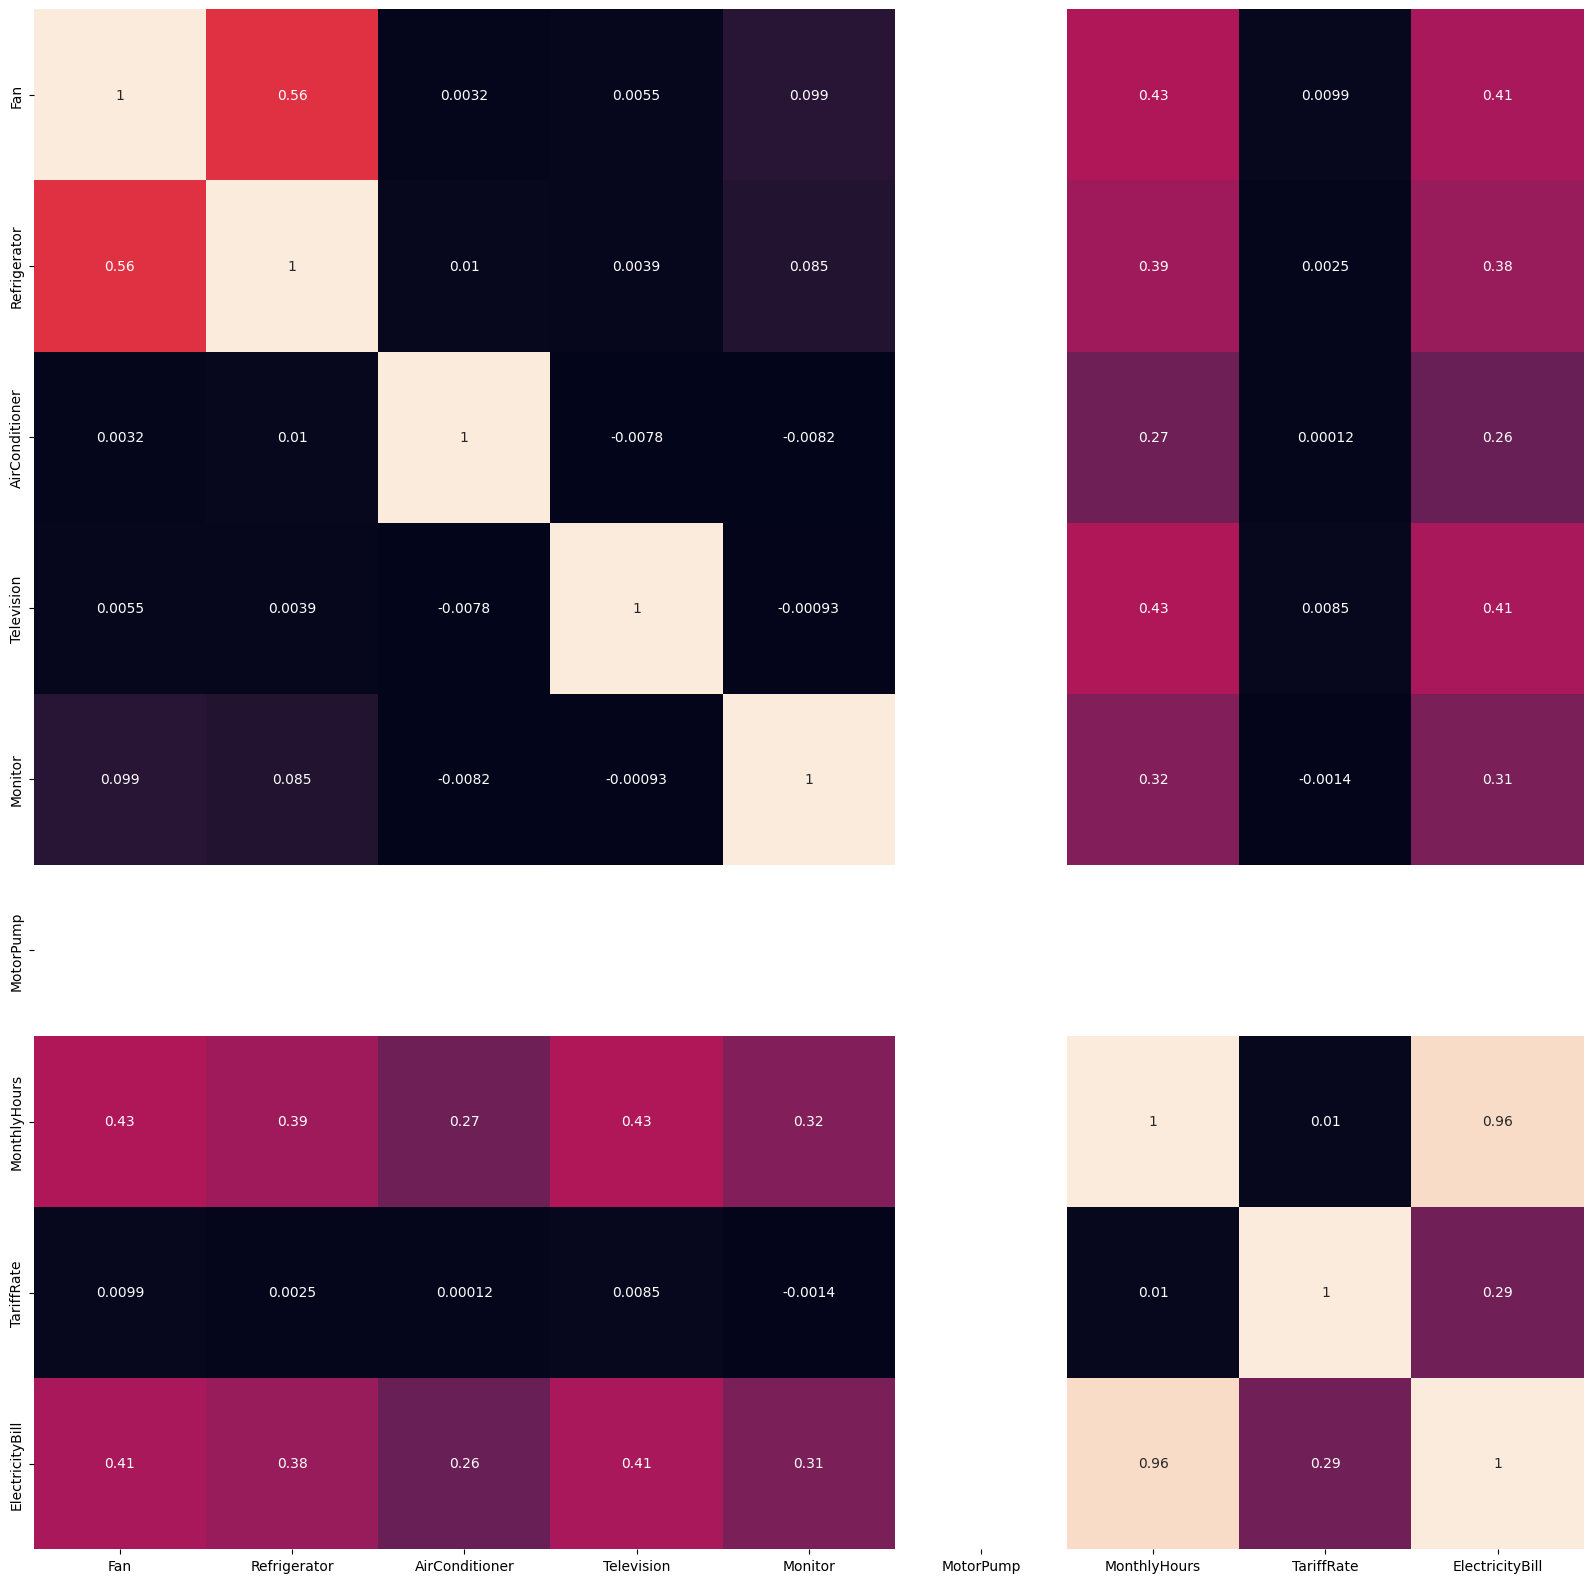

In [75]:
plt.figure(figsize = (20, 20))
corr_matrix = electricity_df.iloc[:, :10].corr()
sns.heatmap(corr_matrix, annot = True, cbar = False)